In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#### We generate the data

In [30]:
observations = 10000 # We increse the number of obervation to 1000

x = np.random.uniform(-10,10,(observations,1))
z = np.random.uniform(-10,10,(observations,1))

gen_inputs = np.column_stack((x,z))

noise = np.random.uniform(-1,1,(observations,1))

gen_targets = 2*x -3*z + 5 + noise

np.savez('TF_Sample2',inputs = gen_inputs, targets = gen_targets) # This saves the generated data in a .npz file

#### Load the data and build the model

In [31]:
training_data = np.load('TF_Sample2.npz')

input_size = 2 # Because there are two input variables
output_size = 1

# To further custimize this model, we can initialize the weights and biases just as we did with numpy
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size, 
                                                   kernel_initializer = tf.random_uniform_initializer
                                                  (-0.1, 0.1),
                                                   bias_initializer = tf.random_uniform_initializer
                                                   (-0.1, 0.1))]) # This allows us to build and define the model

# We can also define the learning rate for the optimization algorithm
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)


In [39]:
model.compile(optimizer = custom_optimizer, loss = 'huber_loss') # We specify the objective function 
# and optimization algorithm. Here we use the stochastic gradient descent and L2-norm loss per obervation
# The Huber loss is more appropriate than the L2-norm when we have outliers, 
# as it is less sensitive to them. The L2-norm loss puts all differences *to the square*, so outliers 
# have a lot of influence on the outcome.

model.fit(training_data['inputs'],training_data['targets'],epochs = 200, verbose = 2)

Train on 10000 samples
Epoch 1/200
10000/10000 - 0s - loss: 0.6849
Epoch 2/200
10000/10000 - 0s - loss: 0.6673
Epoch 3/200
10000/10000 - 0s - loss: 0.6790
Epoch 4/200
10000/10000 - 0s - loss: 0.6924
Epoch 5/200
10000/10000 - 0s - loss: 0.6971
Epoch 6/200
10000/10000 - 0s - loss: 0.7226
Epoch 7/200
10000/10000 - 0s - loss: 0.6883
Epoch 8/200
10000/10000 - 0s - loss: 0.6878
Epoch 9/200
10000/10000 - 0s - loss: 0.6989
Epoch 10/200
10000/10000 - 0s - loss: 0.6816
Epoch 11/200
10000/10000 - 0s - loss: 0.6629
Epoch 12/200
10000/10000 - 0s - loss: 0.7040
Epoch 13/200
10000/10000 - 0s - loss: 0.6824
Epoch 14/200
10000/10000 - 0s - loss: 0.6779
Epoch 15/200
10000/10000 - 0s - loss: 0.6727
Epoch 16/200
10000/10000 - 0s - loss: 0.7142
Epoch 17/200
10000/10000 - 0s - loss: 0.6790
Epoch 18/200
10000/10000 - 0s - loss: 0.6905
Epoch 19/200
10000/10000 - 0s - loss: 0.7284
Epoch 20/200
10000/10000 - 0s - loss: 0.7271
Epoch 21/200
10000/10000 - 0s - loss: 0.6931
Epoch 22/200
10000/10000 - 0s - loss: 0.7

Epoch 181/200
10000/10000 - 0s - loss: 0.6879
Epoch 182/200
10000/10000 - 0s - loss: 0.6746
Epoch 183/200
10000/10000 - 0s - loss: 0.6778
Epoch 184/200
10000/10000 - 0s - loss: 0.6795
Epoch 185/200
10000/10000 - 0s - loss: 0.6838
Epoch 186/200
10000/10000 - 0s - loss: 0.6994
Epoch 187/200
10000/10000 - 0s - loss: 0.6844
Epoch 188/200
10000/10000 - 0s - loss: 0.6582
Epoch 189/200
10000/10000 - 0s - loss: 0.7003
Epoch 190/200
10000/10000 - 0s - loss: 0.6996
Epoch 191/200
10000/10000 - 0s - loss: 0.7194
Epoch 192/200
10000/10000 - 0s - loss: 0.7003
Epoch 193/200
10000/10000 - 0s - loss: 0.6794
Epoch 194/200
10000/10000 - 0s - loss: 0.7099
Epoch 195/200
10000/10000 - 0s - loss: 0.6989
Epoch 196/200
10000/10000 - 0s - loss: 0.7013
Epoch 197/200
10000/10000 - 0s - loss: 0.6790
Epoch 198/200
10000/10000 - 0s - loss: 0.6884
Epoch 199/200
10000/10000 - 0s - loss: 0.7161
Epoch 200/200
10000/10000 - 0s - loss: 0.6888


#### Extract the weights and biases

In [33]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
weights

array([[ 1.9528759],
       [-2.8266501]], dtype=float32)

In [34]:
bias

array([5.0454874], dtype=float32)

In [35]:
# Let us examine the outputs with the the targets using the trained model
np.round(model.predict_on_batch(training_data['inputs']),1)

array([[ -7.4],
       [ 10.5],
       [-10.6],
       ...,
       [ 12.7],
       [ 20.5],
       [-21.6]], dtype=float32)

In [36]:
np.round(training_data['targets'],1)

array([[ -8.9],
       [ 12.4],
       [-10.4],
       ...,
       [ 14.5],
       [ 21.4],
       [-23.8]])

#### Plot the outputs against the targets

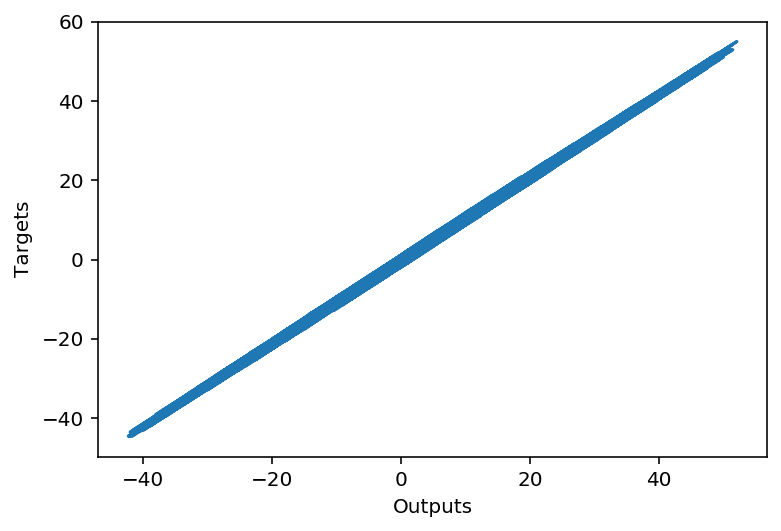

In [37]:
# We take out the 1-d entries in the matrix in order to plot our data with a list 
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()